In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import gcf, figure
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingClassifier
import mglearn
%matplotlib inline

#путь к файлу
data = pd.read_csv(r'/home/nikita/ML/pipes/ML_pipes/info/Informatsia.csv')
#data = pd.read_csv(r'H:/Machine_learning/info/Informatsia.csv')

pipes = pd.DataFrame(data)

pipes_for_lin_reg = pipes.head(1200).tail(300).append(pipes.tail(1200).head(300))

pipes = pipes.head(1200).append(pipes.tail(1200))

map_to_int = {name: n for n, name in enumerate(pipes["Вид прокладки тепловой сети"].unique())}
pipes["Вид прокладки тепловой сети"] = pipes["Вид прокладки тепловой сети"].replace(map_to_int)
pipes_for_lin_reg["Вид прокладки тепловой сети"] = pipes_for_lin_reg["Вид прокладки тепловой сети"].replace(map_to_int)
def encode_target(pipes, target_column):
    pipes_mod = pipes.copy()
    targets = pipes[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    pipes_mod["Target"] = pipes_mod[target_column].replace(map_to_int)
    
    return(pipes_mod, targets)

In [5]:
del pipes['Unnamed: 25']
del pipes['Unnamed: 26']
del pipes['Unnamed: 27']
del pipes_for_lin_reg['Unnamed: 25']
del pipes_for_lin_reg['Unnamed: 26']
del pipes_for_lin_reg['Unnamed: 27']

In [6]:
pipes2, targets = encode_target(pipes, "Аварийность")
pipes_for_lin_reg2, targets2 = encode_target(pipes_for_lin_reg, "Аварийность")

for i in range(len(pipes.columns)):
   print(i, ":", pipes.columns[i])

0 : Sys
1 : Номер источника
2 : Наименование начала участка
3 : Наименование конца участка
4 : Балансодержатель
5 : Длина участка, м
6 : Внутpенний диаметp подающего тpубопpовода, м
7 : Внутренний диаметр обратного трубопровода, м
8 : Диаметр условный ПТ, мм
9 : Диаметр условный ОТ, мм
10 : Шероховатость подающего трубопровода, мм
11 : Шероховатость обратного трубопровода, мм
12 : Год ввода в эксплуатацию
13 : Вид прокладки тепловой сети
14 : Коэффициент местного сопротивления под.тр-да
15 : Коэффициент местного сопротивления обр.тр-да
16 : Зарастание подающего трубопровода, мм
17 : Зарастание обратного трубопровода, мм
18 : Расход воды в подающем трубопроводе, т/ч
19 : Расход воды в обратном трубопроводе, т/ч
20 : Потери напора в подающем трубопроводе, м
21 : Потери напора в обратном трубопроводе, м
22 : Удельные линейные потери напора в под.тр-де, мм/м
23 : Удельные линейные потери напора в обр.тр-де, мм/м
24 : Аварийность


In [7]:
disblance = pipes['Аварийность'].value_counts()
print(disblance[1]/disblance[0])

1.0


In [8]:
"""
Надземная = 0
Подземная канальная = 1
Подземная бесканальная = 2
Подвальная = 3
"""

"""
Таргеты:

Без аварии - 0
Авария - 1


"""

#print(pipes2.info())

clmns = list(pipes2.columns[5:24])
#print(pipes2.info())

cr = clmns + list(pipes2.columns[24:25])

for i in range(len(cr)):
   print(i, ":", cr[i])

0 : Длина участка, м
1 : Внутpенний диаметp подающего тpубопpовода, м
2 : Внутренний диаметр обратного трубопровода, м
3 : Диаметр условный ПТ, мм
4 : Диаметр условный ОТ, мм
5 : Шероховатость подающего трубопровода, мм
6 : Шероховатость обратного трубопровода, мм
7 : Год ввода в эксплуатацию
8 : Вид прокладки тепловой сети
9 : Коэффициент местного сопротивления под.тр-да
10 : Коэффициент местного сопротивления обр.тр-да
11 : Зарастание подающего трубопровода, мм
12 : Зарастание обратного трубопровода, мм
13 : Расход воды в подающем трубопроводе, т/ч
14 : Расход воды в обратном трубопроводе, т/ч
15 : Потери напора в подающем трубопроводе, м
16 : Потери напора в обратном трубопроводе, м
17 : Удельные линейные потери напора в под.тр-де, мм/м
18 : Удельные линейные потери напора в обр.тр-де, мм/м
19 : Аварийность


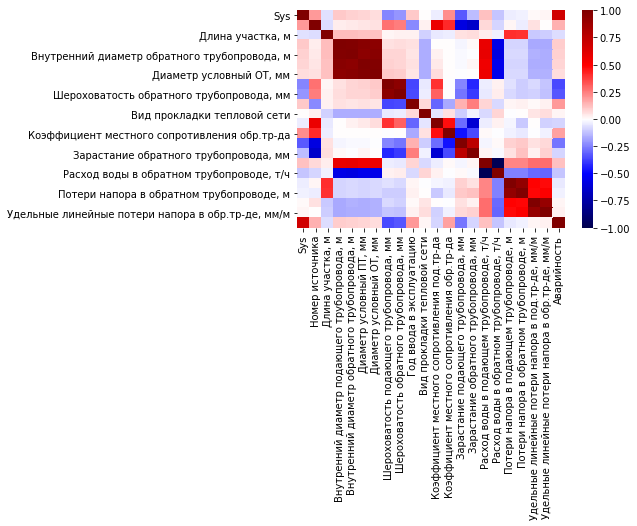

In [9]:
sns.heatmap(pipes.corr('kendall'), cmap="seismic", vmin=-1, vmax=1) ;

In [10]:
corr = pipes[cr].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,"Длина участка, м","Внутpенний диаметp подающего тpубопpовода, м","Внутренний диаметр обратного трубопровода, м","Диаметр условный ПТ, мм","Диаметр условный ОТ, мм","Шероховатость подающего трубопровода, мм","Шероховатость обратного трубопровода, мм",Год ввода в эксплуатацию,Вид прокладки тепловой сети,Коэффициент местного сопротивления под.тр-да,Коэффициент местного сопротивления обр.тр-да,"Зарастание подающего трубопровода, мм","Зарастание обратного трубопровода, мм","Расход воды в подающем трубопроводе, т/ч","Расход воды в обратном трубопроводе, т/ч","Потери напора в подающем трубопроводе, м","Потери напора в обратном трубопроводе, м","Удельные линейные потери напора в под.тр-де, мм/м","Удельные линейные потери напора в обр.тр-де, мм/м",Аварийность
"Длина участка, м",1.00,0.30,0.30,0.29,0.29,-0.04,-0.03,0.05,-0.12,-0.04,0.01,0.02,0.06,0.16,-0.16,0.33,0.25,-0.05,-0.06,0.01
"Внутpенний диаметp подающего тpубопpовода, м",0.30,1.00,1.00,0.97,0.97,0.05,0.02,0.13,-0.16,0.02,0.04,0.01,0.14,0.63,-0.64,-0.03,-0.03,-0.09,-0.09,0.13
"Внутренний диаметр обратного трубопровода, м",0.30,1.00,1.00,0.97,0.97,0.06,0.03,0.12,-0.16,0.03,0.04,0.00,0.14,0.63,-0.64,-0.03,-0.03,-0.09,-0.09,0.12
"Диаметр условный ПТ, мм",0.29,0.97,0.97,1.00,1.00,0.07,0.03,0.13,-0.16,0.05,0.04,0.01,0.15,0.65,-0.65,-0.03,-0.04,-0.09,-0.09,0.12
"Диаметр условный ОТ, мм",0.29,0.97,0.97,1.00,1.00,0.08,0.04,0.12,-0.16,0.06,0.03,0.01,0.14,0.65,-0.65,-0.03,-0.04,-0.09,-0.09,0.11
"Шероховатость подающего трубопровода, мм",-0.04,0.05,0.06,0.07,0.08,1.00,0.97,-0.32,-0.02,0.44,-0.03,-0.17,-0.31,0.10,-0.10,-0.11,-0.13,-0.16,-0.16,-0.41
"Шероховатость обратного трубопровода, мм",-0.03,0.02,0.03,0.03,0.04,0.97,1.00,-0.33,-0.02,0.34,-0.02,-0.19,-0.27,-0.02,0.02,-0.12,-0.12,-0.17,-0.17,-0.40
Год ввода в эксплуатацию,0.05,0.13,0.12,0.13,0.12,-0.32,-0.33,1.00,0.09,-0.29,-0.20,0.09,0.11,0.14,-0.14,0.04,0.06,-0.01,-0.00,0.11
Вид прокладки тепловой сети,-0.12,-0.16,-0.16,-0.16,-0.16,-0.02,-0.02,0.09,1.00,-0.00,0.04,-0.11,-0.02,-0.06,0.06,-0.02,-0.00,0.04,0.04,-0.05
Коэффициент местного сопротивления под.тр-да,-0.04,0.02,0.03,0.05,0.06,0.44,0.34,-0.29,-0.00,1.00,0.40,-0.03,-0.49,0.01,-0.01,0.01,-0.13,0.02,-0.01,-0.12


In [11]:
new_clmns = list(clmns[1:15])
for i in new_clmns: print(i)
cr = new_clmns + list(pipes2.columns[24:25])
corr = pipes[cr].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Внутpенний диаметp подающего тpубопpовода, м
Внутренний диаметр обратного трубопровода, м
Диаметр условный ПТ, мм
Диаметр условный ОТ, мм
Шероховатость подающего трубопровода, мм
Шероховатость обратного трубопровода, мм
Год ввода в эксплуатацию
Вид прокладки тепловой сети
Коэффициент местного сопротивления под.тр-да
Коэффициент местного сопротивления обр.тр-да
Зарастание подающего трубопровода, мм
Зарастание обратного трубопровода, мм
Расход воды в подающем трубопроводе, т/ч
Расход воды в обратном трубопроводе, т/ч


,"Внутpенний диаметp подающего тpубопpовода, м","Внутренний диаметр обратного трубопровода, м","Диаметр условный ПТ, мм","Диаметр условный ОТ, мм","Шероховатость подающего трубопровода, мм","Шероховатость обратного трубопровода, мм",Год ввода в эксплуатацию,Вид прокладки тепловой сети,Коэффициент местного сопротивления под.тр-да,Коэффициент местного сопротивления обр.тр-да,"Зарастание подающего трубопровода, мм","Зарастание обратного трубопровода, мм","Расход воды в подающем трубопроводе, т/ч","Расход воды в обратном трубопроводе, т/ч",Аварийность
"Внутpенний диаметp подающего тpубопpовода, м",1.00,1.00,0.97,0.97,0.05,0.02,0.13,-0.16,0.02,0.04,0.01,0.14,0.63,-0.64,0.13
"Внутренний диаметр обратного трубопровода, м",1.00,1.00,0.97,0.97,0.06,0.03,0.12,-0.16,0.03,0.04,0.00,0.14,0.63,-0.64,0.12
"Диаметр условный ПТ, мм",0.97,0.97,1.00,1.00,0.07,0.03,0.13,-0.16,0.05,0.04,0.01,0.15,0.65,-0.65,0.12
"Диаметр условный ОТ, мм",0.97,0.97,1.00,1.00,0.08,0.04,0.12,-0.16,0.06,0.03,0.01,0.14,0.65,-0.65,0.11
"Шероховатость подающего трубопровода, мм",0.05,0.06,0.07,0.08,1.00,0.97,-0.32,-0.02,0.44,-0.03,-0.17,-0.31,0.10,-0.10,-0.41
"Шероховатость обратного трубопровода, мм",0.02,0.03,0.03,0.04,0.97,1.00,-0.33,-0.02,0.34,-0.02,-0.19,-0.27,-0.02,0.02,-0.40
Год ввода в эксплуатацию,0.13,0.12,0.13,0.12,-0.32,-0.33,1.00,0.09,-0.29,-0.20,0.09,0.11,0.14,-0.14,0.11
Вид прокладки тепловой сети,-0.16,-0.16,-0.16,-0.16,-0.02,-0.02,0.09,1.00,-0.00,0.04,-0.11,-0.02,-0.06,0.06,-0.05
Коэффициент местного сопротивления под.тр-да,0.02,0.03,0.05,0.06,0.44,0.34,-0.29,-0.00,1.00,0.40,-0.03,-0.49,0.01,-0.01,-0.12
Коэффициент местного сопротивления обр.тр-да,0.04,0.04,0.04,0.03,-0.03,-0.02,-0.20,0.04,0.40,1.00,-0.15,-0.18,0.03,-0.03,0.18


In [12]:
X, y = pipes[new_clmns], pipes2['Target']

X_test, y_test = pipes_for_lin_reg[new_clmns], pipes_for_lin_reg2['Target']

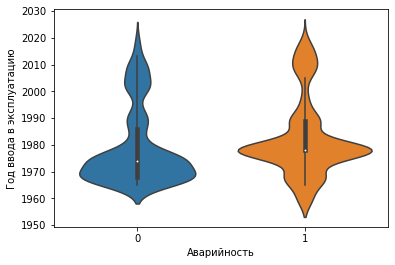

In [13]:
sns.violinplot(x='Аварийность', y='Год ввода в эксплуатацию', data=pipes);

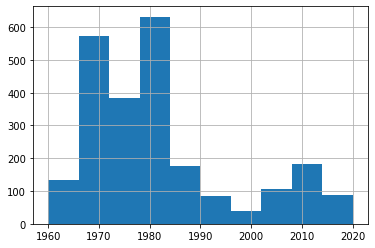

In [14]:
pipes['Год ввода в эксплуатацию'].hist();

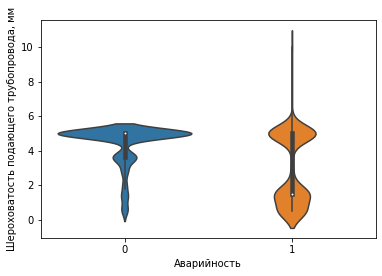

In [15]:
sns.violinplot(x='Аварийность', y='Шероховатость подающего трубопровода, мм', data=pipes);

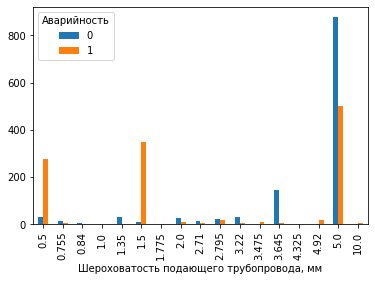

In [16]:
ct = pd.crosstab(pipes['Шероховатость подающего трубопровода, мм'], pipes['Аварийность'])
ct.plot.bar();

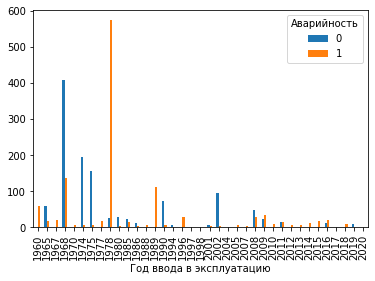

In [17]:
ct = pd.crosstab(pipes['Год ввода в эксплуатацию'], pipes['Аварийность'])
ct.plot.bar();

0 : Длина участка, м
1 : Внутpенний диаметp подающего тpубопpовода, м
2 : Внутренний диаметр обратного трубопровода, м
3 : Диаметр условный ПТ, мм
4 : Диаметр условный ОТ, мм
5 : Шероховатость подающего трубопровода, мм
6 : Шероховатость обратного трубопровода, мм
7 : Год ввода в эксплуатацию
8 : Вид прокладки тепловой сети
9 : Коэффициент местного сопротивления под.тр-да
10 : Коэффициент местного сопротивления обр.тр-да
11 : Зарастание подающего трубопровода, мм
12 : Зарастание обратного трубопровода, мм
13 : Расход воды в подающем трубопроводе, т/ч
14 : Расход воды в обратном трубопроводе, т/ч
15 : Потери напора в подающем трубопроводе, м
16 : Потери напора в обратном трубопроводе, м
17 : Удельные линейные потери напора в под.тр-де, мм/м
18 : Удельные линейные потери напора в обр.тр-де, мм/м


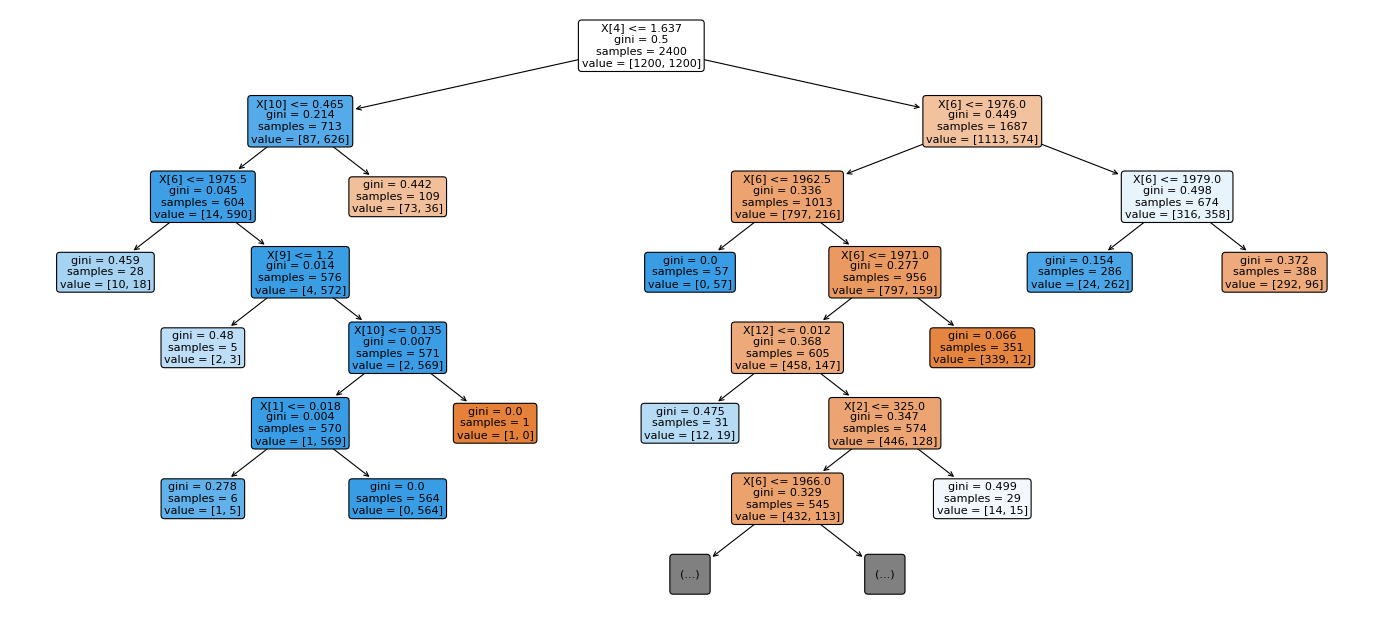

In [18]:
dt = tree.DecisionTreeClassifier(min_samples_split=450)
dt.fit(X, y)
figure(num=None, figsize=(22, 10), dpi=80, facecolor='w', edgecolor='k')
#feature_names=clmns для вывода названий таблиц
tree.plot_tree(dt, filled=True, fontsize=10, rounded=True, max_depth=6)
for i in range(len(clmns)):
   print(i, ":", clmns[i])
plt.show()

In [28]:
#предугадывание шанса аварии
#print(dt.predict_proba([[0.5, 0.5, 2020]])[0])
print("Оценка на обучающем наборе данных: ", dt.score(X, y))
print("Оценка на тестовом наборе данных: ", dt.score(X_test, y_test))

Оценка на обучающем наборе данных:  0.8675
Оценка на тестовом наборе данных:  0.7866666666666666


In [20]:
lr = Ridge().fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[ 1.14138406e-01 -2.91203971e-02  2.23869166e-03 -2.01593609e-03
 -2.87453854e-01  1.66785635e-01 -7.75664883e-04 -2.30967037e-02
  3.57726648e-01  9.59650828e-01 -1.90410454e-02 -7.21154040e-03
  4.89264980e-03  4.91713609e-03]
0.7577538243556661


In [21]:
print(X_test.shape, y_test.shape)

(600, 14) (600,)


In [29]:
print(lr.score(X, y))
print(lr.score(X_test, y_test))

0.24501984880684236
0.19041415699645237


In [30]:
#print(lr.predict(np.array([[10, 0.050, 0.050, 50, 50, 0.5, 0.5, 2020, 1]])))

In [31]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=15)
gbrt.fit(X, y)
print(gbrt.score(X, y))
print(gbrt.score(X_test, y_test))

0.98375
0.965


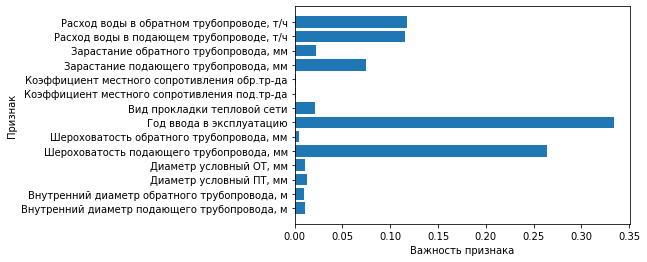

In [25]:
def plot_feature_importances(model):
 n_features = X.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), new_clmns)
 plt.xlabel("Важность признака")
 plt.ylabel("Признак")
plot_feature_importances(gbrt)

In [36]:
print(X.describe())
#print(gbrt.predict(np.array([[0.082, 0.050, 0.050, 50, 50, 0.5, 0.5, 2020, 1]])))

       Внутpенний диаметp подающего тpубопpовода, м  \
count                                   2400.000000   
mean                                       0.126001   
std                                        0.121018   
min                                        0.000000   
25%                                        0.070000   
50%                                        0.082000   
75%                                        0.150000   
max                                        0.992000   

       Внутренний диаметр обратного трубопровода, м  Диаметр условный ПТ, мм  \
count                                   2400.000000              2400.000000   
mean                                       0.125290               122.297917   
std                                        0.121188               118.137117   
min                                        0.000000                 0.000000   
25%                                        0.070000                70.000000   
50%                     